# Merging and Visualization of Landsat .tif files
Code to merge and visualize multiple landsat .tif images.

In [1]:
#Packages
import os, glob
import rasterio
from rasterio.merge import merge

In [2]:
#Check working directory
cwd = os.getcwd()
cwd

'K:\\geog250\\PythonSWR'

In [3]:
#Create mosaic of each band
#Band 4
files_to_mosaic = glob.glob('K:\geog250\PythonSWR/Landsat C2 L2 BF/MergeFiles2/*B4.tif')
files_to_mosaic

with rasterio.open(files_to_mosaic[1]) as src:
    meta = src.meta.copy()

#The merge function returns a single array and the affine transform info
arr, out_trans = merge(files_to_mosaic)

meta.update({
    "driver": "GTiff",
    "height": arr.shape[1],
    "width": arr.shape[2],
    "transform": out_trans
})

# Write the mosaic raster to disk
with rasterio.open('Landsat_Band4.tif', "w", **meta) as dest:
    dest.write(arr)
    
#Band 3
files_to_mosaic = glob.glob('K:\geog250\PythonSWR/Landsat C2 L2 BF/MergeFiles2/*B3.tif')
files_to_mosaic

with rasterio.open(files_to_mosaic[1]) as src:
    meta = src.meta.copy()

#The merge function returns a single array and the affine transform info
arr, out_trans = merge(files_to_mosaic)

meta.update({
    "driver": "GTiff",
    "height": arr.shape[1],
    "width": arr.shape[2],
    "transform": out_trans
})

# Write the mosaic raster to disk
with rasterio.open('Landsat_Band4.tif', "w", **meta) as dest:
    dest.write(arr)
    
#Band 2
files_to_mosaic = glob.glob('K:\geog250\PythonSWR/Landsat C2 L2 BF/MergeFiles2/*B2.tif')
files_to_mosaic

with rasterio.open(files_to_mosaic[1]) as src:
    meta = src.meta.copy()

#The merge function returns a single array and the affine transform info
arr, out_trans = merge(files_to_mosaic)

meta.update({
    "driver": "GTiff",
    "height": arr.shape[1],
    "width": arr.shape[2],
    "transform": out_trans
})

# Write the mosaic raster to disk
with rasterio.open('Landsat_Band4.tif', "w", **meta) as dest:
    dest.write(arr)

In [4]:
#NOTE: for this cell to run the most recent glob import can't be active
#Restart kernel and don't run previous box
import os
from glob import glob
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt

#Get tif files
landsat_merged = os.path.join("Landsat C2 L2 BF", "MergedLandsatBands")
post_merged = glob(os.path.join(landsat_merged,
                                        "Landsat_Band*.TIF"))
#Sort the files
post_merged.sort()
post_merged

['Landsat C2 L2 BF\\MergedLandsatBands\\Landsat_Band2.tif',
 'Landsat C2 L2 BF\\MergedLandsatBands\\Landsat_Band3.tif',
 'Landsat C2 L2 BF\\MergedLandsatBands\\Landsat_Band4.tif']

In [5]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [6]:
#Applies the previous function
all_bands_merged = []
for i, aband in enumerate(post_merged):
    all_bands_merged.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands_merged[i]["band"]=i+1

In [7]:
#Turn bands into a plotable array
landsat_post_merged = xr.concat(all_bands_merged, dim="band") 
landsat_post_merged

<xarray.DataArray (band: 3, y: 13231, x: 9321)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 4.728e+05 4.728e+05 ... 7.524e+05 7.524e+05
  * y            (y) float64 6.317e+06 6.317e+06 ... 5.921e+06 5.92e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_COVARIANCES:  879483.6968758268
    STATISTICS_MAXIMUM:      44048
    STATISTICS_MEAN:         8256.8790264792
    STATISTICS_MEDIAN:       nan
    STATISTICS_MINIMUM:      5
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       937.80792109889
    scale_factor:            1.0
    add_offset:              0.0

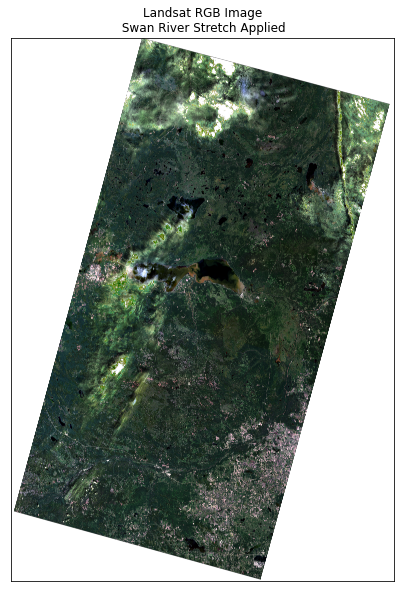

In [8]:
#Plot the tif images as a rgb
ep.plot_rgb(landsat_post_merged.values,
            rgb=[2,1,0],
            title="Landsat RGB Image\n Swan River Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()